In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [3]:
# get some data
titanic = sns.load_dataset('titanic')

## General Info

In [24]:

titanic.dtypes.to_dict()

{'survived': dtype('int64'),
 'pclass': dtype('int64'),
 'sex': dtype('O'),
 'age': dtype('float64'),
 'sibsp': dtype('int64'),
 'parch': dtype('int64'),
 'fare': dtype('float64'),
 'embarked': dtype('O'),
 'class': CategoricalDtype(categories=['First', 'Second', 'Third'], ordered=False),
 'who': dtype('O'),
 'adult_male': dtype('bool'),
 'deck': CategoricalDtype(categories=['A', 'B', 'C', 'D', 'E', 'F', 'G'], ordered=False),
 'embark_town': dtype('O'),
 'alive': dtype('O'),
 'alone': dtype('bool')}

# DataFrame vs Series vs Array

## Different shapes and different methods available

In [15]:
ttc[['age']].head() # index and column names

,age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0


In [16]:
ttc.age.head()   # index but no column name

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: age, dtype: float64

In [28]:
ttc.age.head().values  # no index, no column name

array([22., 38., 26., 35., 35.])

In [117]:
ttc.age.values.head()   # loose pandas methos once becomes 

AttributeError: 'numpy.ndarray' object has no attribute 'head'

# Read and Write Data

## Methods some part of DF,  some part of pd

In [9]:
file = "~/Desktop/pandas_talk/ttc.csv"

titanic.to_csv(file, index=None) ; ttc = pd.read_csv(file, index_col=None, dtype=ttc.dtypes.to_dict())

In [8]:
! head ~/Desktop/pandas_talk/ttc.csv

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.25,S,Third,man,True,,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.925,S,Third,woman,False,,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.05,S,Third,man,True,,Southampton,no,True
5,0,3,male,,0,0,8.4583,Q,Third,man,True,,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.075,S,Third,child,False,,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,,Southampton,yes,False


## Indices are important in Pandas

### how pandas handles them in read/write is a pain

In [22]:
ttc.dtypes.to_dict()    # we lost some categoricals 

{'survived': dtype('int64'),
 'pclass': dtype('int64'),
 'sex': dtype('O'),
 'age': dtype('float64'),
 'sibsp': dtype('int64'),
 'parch': dtype('int64'),
 'fare': dtype('float64'),
 'embarked': dtype('O'),
 'class': dtype('O'),
 'who': dtype('O'),
 'adult_male': dtype('bool'),
 'deck': dtype('O'),
 'embark_town': dtype('O'),
 'alive': dtype('O'),
 'alone': dtype('bool')}

In [17]:
ttc.head().transpose()

,0,1,2,3,4
survived,0,1,1,1,0
pclass,3,1,3,1,3
sex,male,female,female,female,male
age,22,38,26,35,35
sibsp,1,1,0,1,0
parch,0,0,0,0,0
fare,7.25,71.2833,7.925,53.1,8.05
embarked,S,C,S,S,S
class,Third,First,Third,First,Third
who,man,woman,woman,woman,man


In [21]:
ttc.select_dtypes('category').transpose()

,0,1,2,3,4,5,6,7,8,9,...,881,882,883,884,885,886,887,888,889,890


In [235]:
titanic.to_csv(file, index=None)  ; ttc = pd.read_csv(file, index_col=None)
ttc.dtypes

survived         int64
pclass           int64
sex             object
age            float64
sibsp            int64
parch            int64
fare           float64
embarked        object
class           object
who             object
adult_male        bool
deck            object
embark_town     object
alive           object
alone             bool
dtype: object

### You can also loose your typing reading out to csv

#### Categories

In [84]:
ttc.select_dtypes('category').transpose()

,0,1,2,3,4,5,6,7,8,9,...,881,882,883,884,885,886,887,888,889,890
deck,NaN,C,NaN,C,NaN,NaN,E,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,B,NaN,C,NaN


In [81]:
ttc.deck = pd.Categorical(ttc.deck ) 

In [83]:
ttc.deck.dtype

CategoricalDtype(categories=['A', 'B', 'C', 'D', 'E', 'F', 'G'], ordered=False)

In [236]:
titanic.to_csv(file, index=None)  ; ttc = pd.read_csv(file, index_col=None, dtype=titanic.dtypes.to_dict())
ttc.dtypes   

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [255]:
[a==b for a,b in zip(titanic.dtypes.values , ttc.dtypes.values)]

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True]

## Method chaining

In [257]:
ttc.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
survived,0,1,1,1,0,0,0,0,1,1
pclass,3,1,3,1,3,3,1,3,3,2
sex,male,female,female,female,male,male,male,male,female,female
age,22,38,26,35,35,NaN,54,2,27,14
sibsp,1,1,0,1,0,0,0,3,0,1
parch,0,0,0,0,0,0,0,1,2,0
fare,7.25,71.2833,7.925,53.1,8.05,8.4583,51.8625,21.075,11.1333,30.0708
embarked,S,C,S,S,S,Q,S,S,S,C
class,Third,First,Third,First,Third,Third,First,Third,Third,Second
who,man,woman,woman,woman,man,man,man,child,woman,child


## Check missingness 

In [39]:
ttc.isna().mean().sort_values(ascending=False)

deck           0.772166
age            0.198653
embark_town    0.002245
embarked       0.002245
alone          0.000000
alive          0.000000
adult_male     0.000000
who            0.000000
class          0.000000
fare           0.000000
parch          0.000000
sibsp          0.000000
sex            0.000000
pclass         0.000000
survived       0.000000
dtype: float64

In [29]:
ttc.isna().mean(axis=1)

0      0.066667
1      0.000000
2      0.066667
3      0.000000
4      0.066667
5      0.133333
6      0.000000
7      0.066667
8      0.066667
9      0.066667
10     0.000000
11     0.000000
12     0.066667
13     0.066667
14     0.066667
15     0.066667
16     0.066667
17     0.133333
18     0.066667
19     0.133333
20     0.066667
21     0.000000
22     0.066667
23     0.000000
24     0.066667
25     0.066667
26     0.133333
27     0.000000
28     0.133333
29     0.133333
         ...   
861    0.066667
862    0.000000
863    0.133333
864    0.066667
865    0.066667
866    0.066667
867    0.000000
868    0.133333
869    0.066667
870    0.066667
871    0.000000
872    0.000000
873    0.066667
874    0.066667
875    0.066667
876    0.066667
877    0.066667
878    0.133333
879    0.000000
880    0.066667
881    0.066667
882    0.066667
883    0.066667
884    0.066667
885    0.066667
886    0.066667
887    0.000000
888    0.133333
889    0.000000
890    0.066667
Length: 891, dtype: floa

# Basic numerical operations

In [106]:
ttc.age.max()  # ttc.age.agg('max')

80.0

In [30]:
ttc.age.agg(['max', 'min', np.median])

max       80.00
min        0.42
median    28.00
Name: age, dtype: float64

In [119]:
ttc.agg({'age':['max', 'min'], 'fare':'mean'})

,age,fare
max,80.00,NaN
mean,NaN,32.204208
min,0.42,NaN


In [130]:
%time ttc.age.head() + 3

CPU times: user 398 µs, sys: 1 µs, total: 399 µs
Wall time: 407 µs


0    25.0
1    41.0
2    29.0
3    38.0
4    38.0
Name: age, dtype: float64

In [131]:
%time ttc.age.head().apply(lambda x: x+3)   # if you put head at the end, it'll be slower

CPU times: user 518 µs, sys: 8 µs, total: 526 µs
Wall time: 565 µs


0    25.0
1    41.0
2    29.0
3    38.0
4    38.0
Name: age, dtype: float64

In [ ]:
def so(x):
    return x+3

In [ ]:
ttc.age.head().apply(so)

In [ ]:
ttc.acut

# Basic groups / Agg

In [258]:
ttc.groupby('adult_male').count() 

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,deck,embark_town,alive,alone
adult_male,,,,,,,,,,,,,,
False,354,354,354,301,354,354,354,352,354,354,104,352,354,354
True,537,537,537,413,537,537,537,537,537,537,99,537,537,537


In [67]:
ttc.groupby('adult_male').size()     # different from count

adult_male
False    354
True     537
dtype: int64

In [145]:
ttc.adult_male.value_counts(normalize=True)  

True     0.602694
False    0.397306
Name: adult_male, dtype: float64

In [144]:
ttc.adult_male.mean().round(3)   # can do mean on Booleans

0.603

In [166]:
pd.crosstab(ttc.adult_male, ttc.who)#.transpose()

adult_male,False,True
who,,
child,83,0
man,0,537
woman,271,0


In [31]:
ttc.pivot_table(index='adult_male', columns=['embark_town','who'], values="fare", aggfunc='mean')

embark_town  Cherbourg                       Queenstown                        \
who              child        man      woman      child        man      woman   
adult_male                                                                      
False        17.289594        NaN  87.649373   24.90584        NaN  12.766551   
True               NaN  50.023568        NaN        NaN  12.186373        NaN   

embark_town Southampton                        
who               child        man      woman  
adult_male                                     
False         38.091318        NaN  38.821098  
True                NaN  20.485485        NaN

## Reshape

In [43]:
ttc[['who', 'age', 'embark_town']].head()

,who,age,embark_town
0,man,22.0,Southampton
1,woman,38.0,Cherbourg
2,woman,26.0,Southampton
3,woman,35.0,Southampton
4,man,35.0,Southampton


In [41]:
ttc.reset_index()\
    .melt( id_vars='index',value_vars=['who', 'age', 'embark_town'])

,index,variable,value
0,0,who,man
1,1,who,woman
2,2,who,woman
3,3,who,woman
4,4,who,man
5,5,who,man
6,6,who,man
7,7,who,child
8,8,who,woman
9,9,who,child


In [44]:
ttc.reset_index()\
    .melt( id_vars='index',value_vars=['who', 'age', 'embark_town'])\
    .pivot(index='index', columns='variable', values=['value'])#['value']

value                    
variable   age  embark_town    who
index                             
0           22  Southampton    man
1           38    Cherbourg  woman
2           26  Southampton  woman
3           35  Southampton  woman
4           35  Southampton    man
5          NaN   Queenstown    man
6           54  Southampton    man
7            2  Southampton  child
8           27  Southampton  woman
9           14    Cherbourg  child
10           4  Southampton  child
11          58  Southampton  woman
12          20  Southampton    man
13          39  Southampton    man
14          14  Southampton  child
15          55  Southampton  woman
16           2   Queenstown  child
17         NaN  Southampton    man
18          31  Southampton  woman
19         NaN    Cherbourg  woman
20          35  Southampton    man
21          34  Southampton    man
22          15   Queenstown  child
23          28  Southampton    man
24           8  Southampton  child
25          38  Southampton  woman
26         NaN    Cherbourg    man
27          19  Southampton    man
28         NaN   Queenstown  woman
29         NaN  Southampton    man
...        ...          ...    ...
861         21  Southampton    man
862         48  Southampton  woman
863        NaN  Southampton  woman
864         24  Southampton    man
865         42  Southampton  woman
866         27    Cherbourg  woman
867         31  Southampton    man
868        NaN  Southampton    man
869          4  Southampton  child
870         26  Southampton    man
871         47  Southampton  woman
872         33  Southampton    man
873         47  Southampton    man
874         28    Cherbourg  woman
875         15    Cherbourg  child
876         20  Southampton    man
877         19  Southampton    man
878        NaN  Southampton    man
879         56    Cherbourg  woman
880         25  Southampton  woman
881         33  Southampton    man
882         22  Southampton  woman
883         28  Southampton    man
884         25  Southampton    man
885         39   Queenstown  woman
886         27  Southampton    man
887         19  Southampton  woman
888        NaN  Southampton  woman
889         26    Cherbourg    man
890         32   Queenstown    man

[891 rows x 3 columns]

# Indexes are smart

In [245]:
ttc.groupby('deck').fare.mean()

deck
A     39.623887
B    113.505764
C    100.151341
D     57.244576
E     46.026694
F     18.696792
G     13.581250
Name: fare, dtype: float64

In [47]:
ttc.groupby('deck').fare.mean().sort_values()  # sort_index()

deck
G     13.581250
F     18.696792
A     39.623887
E     46.026694
D     57.244576
C    100.151341
B    113.505764
Name: fare, dtype: float64

In [248]:
ttc.groupby('deck').fare.mean().sort_values().diff().rename("diff_fare")

deck
G          NaN
F     5.115542
A    20.927094
E     6.402807
D    11.217882
C    42.906765
B    13.354423
Name: diff_fare, dtype: float64

In [50]:
pd.concat([ttc.groupby('deck').fare.mean()
           , ttc.groupby('deck').fare.mean().sort_values().diff().rename("diff_fare")]
          , 1).astype(str)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  This is separate from the ipykernel package so we can avoid doing imports until


,fare,diff_fare
A,39.623886666666664,20.927094358974355
B,113.50576382978724,13.354423151821123
C,100.15134067796612,42.90676492039036
D,57.24457575757576,11.217882007575774
E,46.026693749999986,6.402807083333322
F,18.69679230769231,5.1155423076923086
G,13.58125,nan


## Filter

###  create boolean arrays

In [259]:
ttc.shape , ttc[ttc.adult_male].shape

((891, 15), (537, 15))

In [32]:
ttc.select_dtypes('float').transpose()

,0,1,2,3,4,5,6,7,8,9,...,881,882,883,884,885,886,887,888,889,890
age,22.00,38.0000,26.000,35.0,35.00,NaN,54.0000,2.000,27.0000,14.0000,...,33.0000,22.0000,28.0,25.00,39.000,27.0,19.0,NaN,26.0,32.00
fare,7.25,71.2833,7.925,53.1,8.05,8.4583,51.8625,21.075,11.1333,30.0708,...,7.8958,10.5167,10.5,7.05,29.125,13.0,30.0,23.45,30.0,7.75


In [33]:
# how many adult males under 20
ttc[ttc.adult_male &  (ttc.age <20)].shape

(49, 15)

#### use '~' to negate boolean

In [151]:
# how many adult males OVER 20
ttc[ttc.adult_male & ~(ttc.age <20)].shape

(488, 15)

In [275]:
np.where(ttc.adult_male, 'guy', 'gal')[:5]

array(['guy', 'gal', 'gal', 'gal', 'guy'], dtype='<U3')

In [52]:
stereotype = {'man':'mars','woman':'venus','child':'earth'}
ttc.who.map(stereotype).head()

0     mars
1    venus
2    venus
3    venus
4     mars
Name: who, dtype: object

In [53]:
ttc.who.map(stereotype).copy()

In [290]:
pd.concat([ttc.adult_male
           , pd.Series(np.where(ttc.adult_male, 'guy', 'gal'))
           , ttc.who.map(stereotype)   ]
          , 1 
          , ignore_index=True
          , ).head()

,0,1,2
0,True,guy,mars
1,False,gal,venus
2,False,gal,venus
3,False,gal,venus
4,True,guy,mars


# Merge, Join, Concat

In [55]:
ad_male = ttc[ttc.adult_male][['age']].copy()
ad_male.shape

(537, 1)

In [56]:
und20 = ttc[ ttc.age <20][['adult_male']]
und20.shape

(164, 1)

In [58]:
ad_male.join(und20).shape   # on index

(537, 2)

In [59]:
ad_male.join(und20, how='inner').shape

(49, 2)

In [62]:
ttc[ttc.adult_male][['age', 'who','fare','embark_town']]\
    .merge(ttc[ttc.age <20][['age', 'fare','embark_town', 'embarked']],
          how='inner', on=['age', 'fare','embark_town', ]).shape #.drop_duplicates().shape

(71, 5)

In [63]:
pd.concat([ttc,ttc],1).shape

(891, 32)

In [64]:
pd.concat([ttc,ttc],0).drop_duplicates(subset='vin', keep='')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,what
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,mars
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,venus
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,venus
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,venus
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,mars
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True,mars
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True,mars
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False,earth
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False,venus
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False,earth


# Strings

In [34]:
ttc.select_dtypes('object').transpose()

,0,1,2,3,4,5,6,7,8,9,...,881,882,883,884,885,886,887,888,889,890
sex,male,female,female,female,male,male,male,male,female,female,...,male,female,male,male,female,male,female,female,male,male
embarked,S,C,S,S,S,Q,S,S,S,C,...,S,S,S,S,Q,S,S,S,C,Q
who,man,woman,woman,woman,man,man,man,child,woman,child,...,man,woman,man,man,woman,man,woman,woman,man,man
embark_town,Southampton,Cherbourg,Southampton,Southampton,Southampton,Queenstown,Southampton,Southampton,Southampton,Cherbourg,...,Southampton,Southampton,Southampton,Southampton,Queenstown,Southampton,Southampton,Southampton,Cherbourg,Queenstown
alive,no,yes,yes,yes,no,no,no,no,yes,yes,...,no,no,no,no,no,no,yes,no,yes,no


In [65]:
ttc.who.value_counts().plot.barh(figsize=(8,6))

AttributeError: 'Series' object has no attribute 'barh'

In [95]:
ttc.who.str.upper().head()

0      MAN
1    WOMAN
2    WOMAN
3    WOMAN
4      MAN
Name: who, dtype: object

In [98]:
# all non-adults
ttc.who.str. #endswith('man').head()

0    True
1    True
2    True
3    True
4    True
Name: who, dtype: bool

In [66]:
pd.get_dummies(pd.Categorical(ttc.who))  # pd.get_dummies(ttc.who)

,child,man,woman
0,0,1,0
1,0,0,1
2,0,0,1
3,0,0,1
4,0,1,0
5,0,1,0
6,0,1,0
7,1,0,0
8,0,0,1
9,1,0,0


In [294]:
ttc.embark_town.str[:4].head()

0    Sout
1    Cher
2    Sout
3    Sout
4    Sout
Name: embark_town, dtype: object

In [296]:
ttc.embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [297]:
ttc.embarked.isin(['S', 'C']).value_counts()

True     812
False     79
Name: embarked, dtype: int64

### Great Groups out of Numerical

In [161]:
pd.cut(ttc.age, bins=10).head()

0    (16.336, 24.294]
1     (32.252, 40.21]
2    (24.294, 32.252]
3     (32.252, 40.21]
4     (32.252, 40.21]
Name: age, dtype: category
Categories (10, interval[float64]): [(0.34, 8.378] < (8.378, 16.336] < (16.336, 24.294] < (24.294, 32.252] ... (48.168, 56.126] < (56.126, 64.084] < (64.084, 72.042] < (72.042, 80.0]]

# Groupby Plotting
### plot a group by a grouped aggregate

In [70]:
ttc.age//2*2

0      22.0
1      38.0
2      26.0
3      34.0
4      34.0
5       NaN
6      54.0
7       2.0
8      26.0
9      14.0
10      4.0
11     58.0
12     20.0
13     38.0
14     14.0
15     54.0
16      2.0
17      NaN
18     30.0
19      NaN
20     34.0
21     34.0
22     14.0
23     28.0
24      8.0
25     38.0
26      NaN
27     18.0
28      NaN
29      NaN
       ... 
861    20.0
862    48.0
863     NaN
864    24.0
865    42.0
866    26.0
867    30.0
868     NaN
869     4.0
870    26.0
871    46.0
872    32.0
873    46.0
874    28.0
875    14.0
876    20.0
877    18.0
878     NaN
879    56.0
880    24.0
881    32.0
882    22.0
883    28.0
884    24.0
885    38.0
886    26.0
887    18.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [72]:
ttc.groupby([ttc.adult_male,ttc.age//5*5]).fare.mean()#.plot()

adult_male  age 
False       0.0     32.409063
            5.0     27.245073
            10.0    36.074487
            15.0    43.714419
            20.0    48.827183
            25.0    28.947913
            30.0    40.278412
            35.0    80.985026
            40.0    67.530556
            45.0    42.095550
            50.0    65.425350
            55.0    72.698600
            60.0    60.698950
True        15.0    22.937922
            20.0    19.560356
            25.0    22.024230
            30.0    17.396234
            35.0    47.747962
            40.0    19.123610
            45.0    37.170681
            50.0    38.606670
            55.0    30.737080
            60.0    51.764391
            65.0    26.694800
            70.0    30.197233
            80.0    30.000000
Name: fare, dtype: float64

In [73]:
ttc.groupby('adult_male')

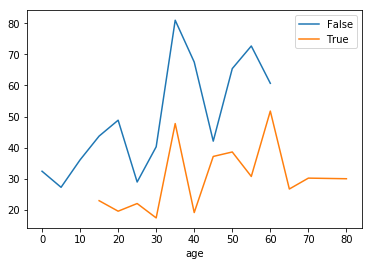

In [164]:
for n,g in ttc.groupby('adult_male'):
#     if n:
#         n="Male"
#     else: n="Female"
    g.groupby(g.age//5*5).fare.mean().plot(label=n)
plt.legend()

In [ ]:
index, review slicing, pd.read_csv() gotchas, to_csv , sample, str. cat. .plot get_dummies, cut(), sparse matrix
groupby vs set_index, multigroup by, agg apply map , .query . sql  join/merge/concat, drop_duplicates

# I do this kind of thing all the time

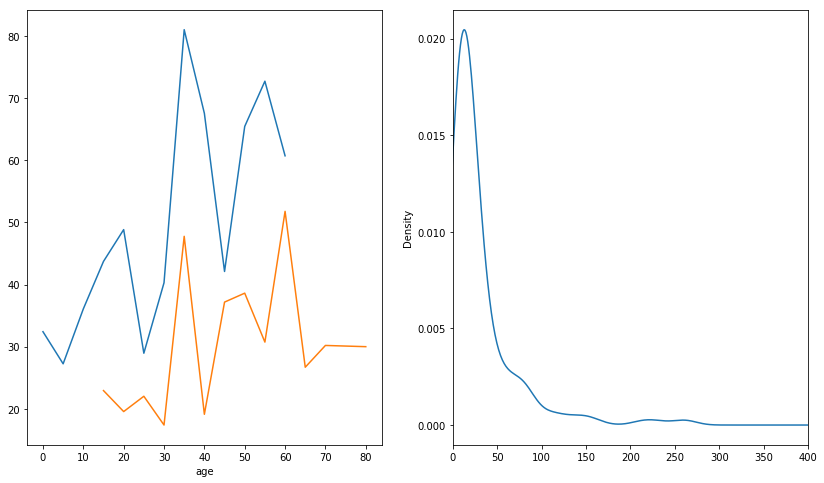

In [75]:
#
fig , (ax1, ax2) = plt.subplots(1,2, figsize=(14,8))

for n,g in ttc.groupby('adult_male'):
#     if n:
#         n="Male"
#     else: n="Female"
    g.groupby(g.age//5*5).fare.mean().plot(label=n, ax=ax1)
    
ttc.fare.plot.density(ax=ax2, xlim=(0,400))



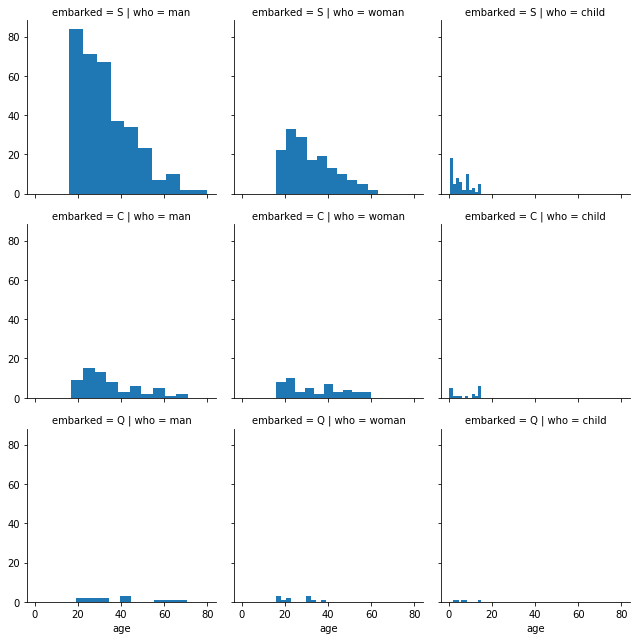

In [307]:
g = sns.FacetGrid(ttc, col='who', row='embarked')
g.map(plt.hist, 'age')